# Objective

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Initialize Inputs

In [3]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output of XOR 

### Declare the network parameters

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs


In [4]:
# Network parameters
inputSize = 2   # Number of input neurons (x1, x2)
hiddenSize = 2  # Number of hidden neurons
outputSize = 1  # Size of output node
lr = 0.1        # Learning Rate
epochs = 180000 # Number of training epochs

### Define the weights
Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm


In [5]:
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize)*2 - 1    # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1)*2 - 1            # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize)*2 - 1   # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1)*2 - 1            # Bias for output layer

### **Training the Neural Network**

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [11]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X)+b1       # Weighted sum for hidden layer
    a1 = 1.0/(1.0+np.exp(-z1))    # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1)+b2      # Weighted sum for output layer
    a2 = 1.0/(1.0+np.exp(-z2))    # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2              # Difference between expected and actual output
    da2 = error*(a2*(1-a2))     # Derivative for output layer   #Check AND Gate for more detailed explanation
    dz2 = da2                   # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)     # Gradient for hidden layer
    dz1 = da1*(a1*(1-a1))
    
    # Update weights and biases
    w2+= lr*np.dot(dz2, a1.T)     # Update weights from hidden to output layer
    b2+= lr*np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1+= lr*np.dot(dz1, X.T)      # Update weights from input to hidden layer
    b1+= lr*np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer

    if (epoch+1)%5000==0:
        print(f'Epochs: {epoch}, Average Error: {np.average(abs(error)):.4f}')
        error_list.append(np.average(abs(error)))

Epochs: 4999, Average Error: 0.0083
Epochs: 9999, Average Error: 0.0081
Epochs: 14999, Average Error: 0.0080
Epochs: 19999, Average Error: 0.0079
Epochs: 24999, Average Error: 0.0078
Epochs: 29999, Average Error: 0.0077
Epochs: 34999, Average Error: 0.0076
Epochs: 39999, Average Error: 0.0075
Epochs: 44999, Average Error: 0.0075
Epochs: 49999, Average Error: 0.0074
Epochs: 54999, Average Error: 0.0073
Epochs: 59999, Average Error: 0.0072
Epochs: 64999, Average Error: 0.0071
Epochs: 69999, Average Error: 0.0070
Epochs: 74999, Average Error: 0.0070
Epochs: 79999, Average Error: 0.0069
Epochs: 84999, Average Error: 0.0068
Epochs: 89999, Average Error: 0.0068
Epochs: 94999, Average Error: 0.0067
Epochs: 99999, Average Error: 0.0066
Epochs: 104999, Average Error: 0.0066
Epochs: 109999, Average Error: 0.0065
Epochs: 114999, Average Error: 0.0065
Epochs: 119999, Average Error: 0.0064
Epochs: 124999, Average Error: 0.0064
Epochs: 129999, Average Error: 0.0063
Epochs: 134999, Average Error: 0.0

**Testing Network**

In [7]:
# Testing trained network
z1 = np.dot(w1, X)+b1           # Weighted sum for hidden layer
a1 = 1.0/(1.0+np.exp(-z1))      # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1)+b2          # Weighted sum for output layer
a2 = 1.0/(1.0+np.exp(-z2))      # Sigmoid activation for output layer

# Printing result
print(f'Final output after updated weight and bias: {a2}')
print(f'True Labels: {d}')
print(f'Error after training: {error}')
print(f'Average Error: {np.average(abs(error)):.4f}')

Final output after updated weight and bias: [[0.00837741 0.99208155 0.99033877 0.00758491]]
True Labels: [0 1 1 0]
Error after training: [[-0.00837743  0.00791847  0.00966126 -0.00758493]]
Average Error: 0.0084


**Plot the error result**

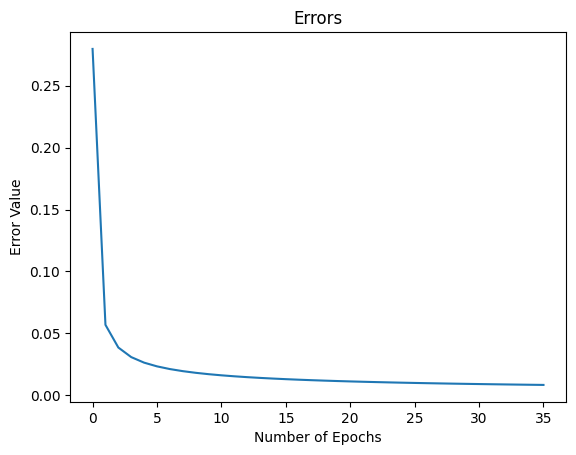

In [8]:
plt.plot(error_list)
plt.xlabel('Number of Epochs')
plt.ylabel('Error Value')
plt.title('Errors')
plt.show()

## Back Propagation fro **AND** Gate

Epochs: 4999, Average Error: 0.0144
Epochs: 9999, Average Error: 0.0094
Epochs: 14999, Average Error: 0.0074
Epochs: 19999, Average Error: 0.0063
Epochs: 24999, Average Error: 0.0056
Epochs: 29999, Average Error: 0.0050
Epochs: 34999, Average Error: 0.0046
Epochs: 39999, Average Error: 0.0043
Epochs: 44999, Average Error: 0.0040
Epochs: 49999, Average Error: 0.0038
Epochs: 54999, Average Error: 0.0036
Epochs: 59999, Average Error: 0.0034
Epochs: 64999, Average Error: 0.0033
Epochs: 69999, Average Error: 0.0032
Epochs: 74999, Average Error: 0.0031
Epochs: 79999, Average Error: 0.0030
Epochs: 84999, Average Error: 0.0029
Epochs: 89999, Average Error: 0.0028
Epochs: 94999, Average Error: 0.0027
Epochs: 99999, Average Error: 0.0026
Epochs: 104999, Average Error: 0.0025
Epochs: 109999, Average Error: 0.0024
Epochs: 114999, Average Error: 0.0024
Epochs: 119999, Average Error: 0.0024
Epochs: 124999, Average Error: 0.0024
Epochs: 129999, Average Error: 0.0023
Epochs: 134999, Average Error: 0.0

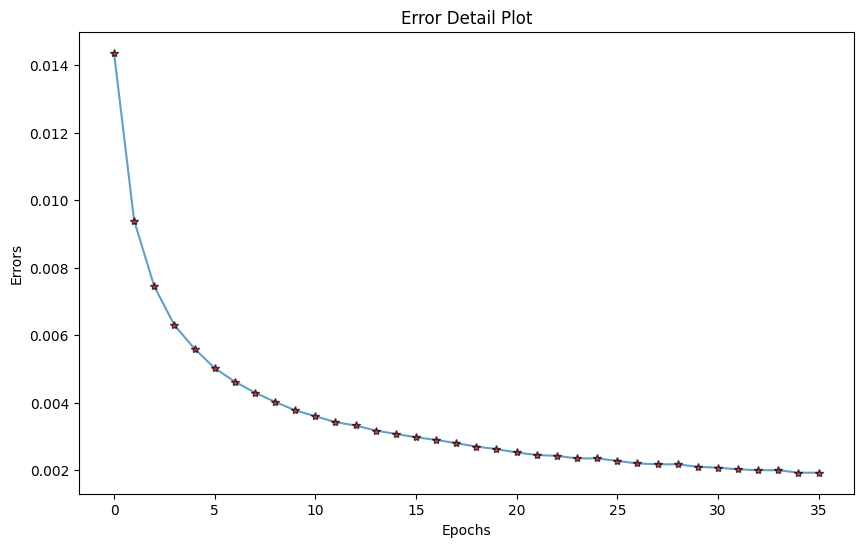

In [12]:
def back_propagation(n_epochs, learning_rate):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
    T = np.array([0, 0, 0, 1])
    n_input = 2
    n_hidden_nodes = 2
    n_output = 1
    lr = learning_rate
    epochs = n_epochs

    w1 = np.random.rand(n_hidden_nodes, n_input)*2-1
    b1 = np.random.rand(n_hidden_nodes, 1)*2-1
    w2 = np.random.rand(n_output, n_hidden_nodes)*2-1
    b2 = np.random.rand(n_output, 1)*2-1
    error_list = []

    def sigmoid_func(m):
        return 1.0/(1.0+np.exp(-m))
    def sigmoid_derivative(p):
        return p*(1-p)

    for epoch in range(epochs):
        # Calculating hidden layer output using input
        z1 = np.dot(w1, X)+b1
        a1 = sigmoid_func(z1)

        # Calculating output at output node
        z2 = np.dot(w2, a1)+b2
        a2 = np.round(sigmoid_func(z2), 4)

        # Error calculation
        error = a2-T    # Derivative of 1/2*(T-a2)^2 = -(T-a2)= a2-T
        # Calculating gradient at output node
        dz2 = error*sigmoid_derivative(a2)
        
        # Calculating gradient at hidden layers
        dz1 = np.dot(w2.T, dz2)*sigmoid_derivative(a1)

        # Back propagating errors
        w2 -= lr*np.dot(dz2, a1.T)      #Formula: w2 = w2-learning_rate*(-(T-a2))*(a2*(1-a2))*a1  which is w2 - np.dot(dz2, a1) #dz1 = (-(T-a2))*(a2*(1-a2))
        b2 -= lr*np.sum(dz2, axis=1, keepdims=True) # Bias is sum of all the biases at the node

        w1 -= lr*np.dot(dz1, X.T)   # Simplification of formula: w1 = w1-learning_rate*(-(T-a2))*(a2*(1-a2))*w2*(a1*(1-a1))*X
        b1 -= lr*np.sum(dz1, axis=1, keepdims=True)

        if (epoch+1)%5000 == 0:
            print(f'Epochs: {epoch}, Average Error: {np.average(abs(error)):.4f}')
            error_list.append(np.average(abs(error)))

    # Calculating output after optimizing error
    def comparison_data():
        z1 = np.dot(w1, X)+b1
        a1 = sigmoid_func(z1)

        z2 = np.dot(w2, a1)+b2
        a2 = np.round(sigmoid_func(z2), 3)
        print("******************************************")
        print("")
        print(f'Output: {a2}')
        print(f'True Label: {T}')
        print(f'Error: {error}')
        print(f'Average Error: {np.average(abs(error)):.4f}')
    comparison_data()

    def plot_data():
        plt.figure(figsize=(10, 6))
        plt.plot(error_list, marker='*', mfc='red', mec='k', alpha=0.7)
        plt.xlabel('Epochs')
        plt.ylabel('Errors')
        plt.title('Error Detail Plot')
        plt.show()
    plot_data()

back_propagation(180000, 0.4)

**For 1000000 epochs and Learning rate: 0.01 for *XOR* Gaate**

Epochs: 9999, Average Error: 0.2246
Epochs: 19999, Average Error: 0.0841
Epochs: 29999, Average Error: 0.0547
Epochs: 39999, Average Error: 0.0423
Epochs: 49999, Average Error: 0.0354
Epochs: 59999, Average Error: 0.0308
Epochs: 69999, Average Error: 0.0275
Epochs: 79999, Average Error: 0.0250
Epochs: 89999, Average Error: 0.0231
Epochs: 99999, Average Error: 0.0215
Epochs: 109999, Average Error: 0.0202
Epochs: 119999, Average Error: 0.0191
Epochs: 129999, Average Error: 0.0182
Epochs: 139999, Average Error: 0.0173
Epochs: 149999, Average Error: 0.0166
Epochs: 159999, Average Error: 0.0160
Epochs: 169999, Average Error: 0.0153
Epochs: 179999, Average Error: 0.0148
Epochs: 189999, Average Error: 0.0143
Epochs: 199999, Average Error: 0.0139
Outcome: [[0.0227 0.9853 0.9851 0.9967]]
Ground Truth: [0 1 1 1]
Error: [[-0.0227  0.0147  0.0149  0.0033]]
Average Error: 0.0139


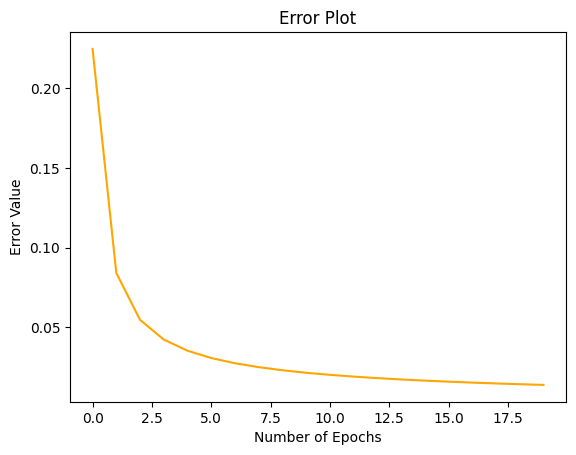

In [10]:
def back_propagation(num_epochs, learning_rate):
    X = np.array([[0,0], [0, 1], [1, 0], [1, 1]]).T
    d = np.array([0, 1, 1, 1])

    num_inputs = 2
    num_hidden = 2
    num_output = 1
    epochs = num_epochs
    lr = learning_rate

    w1 = np.random.rand(num_hidden, num_inputs)*2-1
    b1 = np.random.rand(num_hidden, 1)*2-1
    w2 = np.random.rand(num_output, num_hidden)*2-1
    b2 = np.random.rand(num_output, 1)*2-1

    error_data = []
    for epoch in range(epochs):
        z1 = np.dot(w1, X)+b1
        a1 = 1.0/(1.0+np.exp(-z1))
        z2 = np.dot(w2, a1)+b2
        a2 = np.around(1.0/(1.0+np.exp(-z2)), decimals=4)

        # Error calculation
        error = d - a2
        da2 = error*(a2*(1-a2))
        dz2 = da2

        da1 = np.dot(w2.T, dz2)
        dz1 = da1*(a1*(1-a1))

        w2+= lr*np.dot(dz2, a1.T)
        b2+= lr*np.sum(dz2, axis=1, keepdims=True)
        w1+= lr*np.dot(dz1, X.T)
        b1+= lr*np.sum(dz1, axis=1, keepdims=True)

        if (epoch+1)%10000 == 0:
            print(f'Epochs: {epoch}, Average Error: {np.average(abs(error)):.4f}')
            error_data.append(np.average(abs(error)))
    def comparison_data():
        z1 = np.dot(w1, X)+b1
        a1 = 1.0/(1.0+np.exp(-z1))
        z2 = np.dot(w2, a1)+b2
        a2 = np.around(1.0/(1.0+np.exp(-z2)), decimals=4)
        print(f'Outcome: {a2}')
        print(f'Ground Truth: {d}')
        print(f'Error: {error}')
        print(f'Average Error: {np.average(abs(error)):.4f}')
    comparison_data()

    def plot_data():
        plt.plot(error_data, color='orange')
        plt.title('Error Plot')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Error Value')
        plt.show()
    plot_data()
back_propagation(200000, 0.01)